In [22]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# y = f(x)
x = np.array([1,2,3,4,5,6,7,8,9])
x=x-4.5
#y = 1*np.power(x,3)-10*np.power(x,2)+5*np.power(x,1)+3 
#y = [math.sin(2*np.pi/9*i) for i in x]
#y = np.array(y)
y =  10*np.power(x,2)+2*x+1

t = [i/1000-0.5 for i in range(0,1000,100)]
x = np.array(t)
y = [math.sin(-2*math.pi*tt)+random.random()*0.2 for tt in t]

In [29]:
lr = 1
n = 4
w = np.random.random((1,n))
t = np.array(x)
losses = []
for i in range(100000):
    tt = np.expand_dims(np.array(t),1)
    for j in range(n):
        if j == 0:
            ttt = np.power(tt,0)
        else:
            ttt = np.concatenate((ttt, np.power(tt,j)  ), axis=1)
    #diff = np.sum((y - np.dot(w,ttt.transpose())))
    loss = np.sum(np.power(y - np.dot(w,ttt.transpose()),2))

    dw = []
    for j in range(n):
        dw.append(np.mean( (y- np.dot(w,ttt.transpose()))*np.power(t,j)*(-1)))
    for j in range(n):
        w[0,j] = w[0,j] - lr* dw[j]
    if np.abs(loss)<0.01:
        break
    losses.append(loss)



    

/var/folders/p9/bsbyx0ls1ml2dgl3z09c8mw40000gr/T/ipykernel_19830/1249097453.py:14: RuntimeWarning: overflow encountered in power
  loss = np.sum(np.power(y - np.dot(w,ttt.transpose()),2))
/var/folders/p9/bsbyx0ls1ml2dgl3z09c8mw40000gr/T/ipykernel_19830/1249097453.py:18: RuntimeWarning: invalid value encountered in multiply
  dw.append(np.mean( (y- np.dot(w,ttt.transpose()))*np.power(t,j)*(-1)))
/var/folders/p9/bsbyx0ls1ml2dgl3z09c8mw40000gr/T/ipykernel_19830/1249097453.py:20: RuntimeWarning: invalid value encountered in scalar subtract
  w[0,j] = w[0,j] - lr* dw[j]


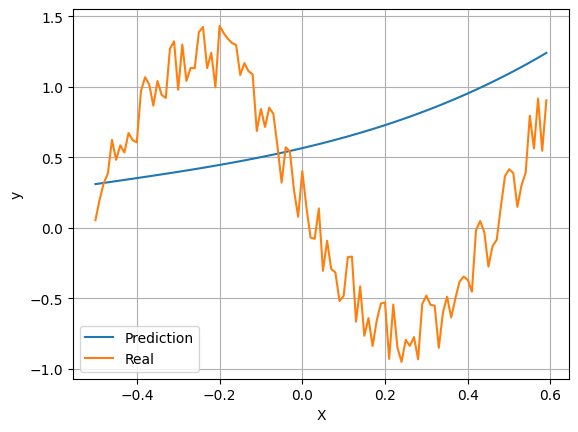

In [27]:
x = [i/10000-0.5 for i in range(0,11000,100)]
x = np.array(x)
for i in range(n):
    if i==0:
        pred = np.power(x,i)*w[0,i]
    else:
        pred += np.power(x,i)*w[0,i]
plt.plot(x,pred, label='Prediction' )
y = [math.sin(-2*math.pi*tt)+random.random()*0.5 for tt in x]
plt.plot(x,y, label='Real' )

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

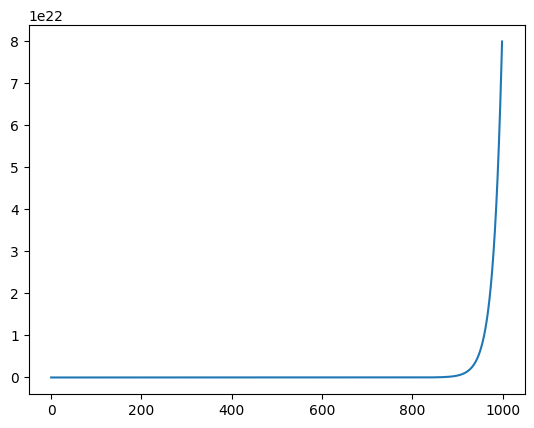

In [30]:
plt.plot(losses[:1000])